![](../img/dl_banner.jpg)

# 基于深度学习的图像检索
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

**提示：如果大家觉得计算资源有限，欢迎大家在翻-墙后免费试用[google的colab](https://colab.research.google.com)，有免费的K80 GPU供大家使用，大家只需要把课程的notebook上传即可运行**

In [0]:
!rm -rf tiny* features
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2019-01-12 15:03:41--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  87.7MB/s    in 2.7s    

2019-01-12 15:03:43 (87.7 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [0]:
import zipfile
zfile = zipfile.ZipFile('tiny-imagenet-200.zip','r')
zfile.extractall()
zfile.close()

In [0]:
!ls

ImageName.txt  sample_data  tiny-imagenet-200  tiny-imagenet-200.zip


In [0]:
!ls tiny-imagenet-200

test  train  val  wnids.txt  words.txt


In [0]:
!ls tiny-imagenet-200/train/n01443537/images | wc -l

500


In [0]:
# -*- coding: utf-8 -*-
import os
import random

# 打开文件以便写入图片名称
out = open("ImageName.txt", 'w')

# 递归遍历文件夹，并以一定的几率把图像名写入文件
def gci(filepath):
  #遍历filepath下所有文件，包括子目录
  files = os.listdir(filepath)
  for fi in files:
    fi_d = os.path.join(filepath,fi)            
    if os.path.isdir(fi_d):
      gci(fi_d)                  
    else:
      if random.random()<=0.02 and fi_d.endswith(".JPEG"):
        out.write(os.path.join(fi_d)+"\n")

In [0]:
filepath = "tiny-imagenet-200"
gci(filepath)
out.close()

In [0]:
!ls

ImageName.txt  sample_data  tiny-imagenet-200  tiny-imagenet-200.zip


In [0]:
!head -5 ImageName.txt 

tiny-imagenet-200/train/n02843684/images/n02843684_219.JPEG
tiny-imagenet-200/train/n02843684/images/n02843684_66.JPEG
tiny-imagenet-200/train/n02843684/images/n02843684_152.JPEG
tiny-imagenet-200/train/n02843684/images/n02843684_479.JPEG
tiny-imagenet-200/train/n02843684/images/n02843684_95.JPEG


# 图像特征抽取
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [0]:
import numpy as np
from numpy import linalg as LA
import h5py
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
import keras.applications.inception_v3 as inception_v3
import keras.applications.vgg16 as vgg16
from keras.applications.vgg16 import VGG16

class InceptionNet:
    def __init__(self):
        # weights: 'imagenet'
        # pooling: 'max' or 'avg'
        # input_shape: (width, height, 3), width and height should >= 48
        self.input_shape = (224, 224, 3)
        self.weight = 'imagenet'
        self.pooling = 'max'
        # 构建不带分类器的预训练模型
        self.model = InceptionV3(weights='imagenet', include_top=False)
        self.model.predict(np.zeros((1, 224, 224 , 3)))

    '''
    Use inception_v3 model to extract features
    Output normalized feature vector
    '''
    def extract_feat(self, img_path):
        img = image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = inception_v3.preprocess_input(img)
        feat = self.model.predict(img)
        return fea
        #norm_feat = feat[0]/LA.norm(feat[0])
        #return norm_feat
      


class VGGNet:
    def __init__(self):
        # weights: 'imagenet'
        # pooling: 'max' or 'avg'
        # input_shape: (width, height, 3), width and height should >= 48
        self.input_shape = (224, 224, 3)
        self.weight = 'imagenet'
        self.pooling = 'max'
        self.model = VGG16(weights = self.weight, input_shape = (self.input_shape[0], self.input_shape[1], self.input_shape[2]), pooling = self.pooling, include_top = False)
        self.model.predict(np.zeros((1, 224, 224 , 3)))

    '''
    Use vgg16 model to extract features
    Output normalized feature vector
    '''
    def extract_feat(self, img_path):
        img = image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = vgg16.preprocess_input(img)
        feat = self.model.predict(img)
        return feat

Using TensorFlow backend.


# 遍历图片抽取图像特征并存储
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [0]:
print("--------------------------------------------------")
print("                   特征抽取开始                     ")
print("--------------------------------------------------")

# 特征与文件名存储列表
feats = []
names = []

# 读取图片列表
img_list = open("ImageName.txt", 'r').readlines()
img_list = [image.strip() for image in img_list]

# 初始化模型
# model = InceptionNet()
model = VGGNet()

# 遍历与特征抽取
for i, img_path in enumerate(img_list):
  norm_feat = model.extract_feat(img_path)
  img_name = os.path.split(img_path)[1]
  feats.append(norm_feat)
  names.append(img_name)
  if i%50 == 0:
    print("抽取图片的特征，进度%d/%d" %((i+1), len(img_list)))

# 特征转换成numpy array格式 
feats = np.array(feats)

print("--------------------------------------------------")
print("                 把抽取的特征写入文件中               ")
print("--------------------------------------------------")

# 把特征写入文件
output = "features"
h5f = h5py.File(output, 'w')
h5f.create_dataset('dataset_1', data = feats)
h5f.create_dataset('dataset_2', data = np.string_(names))
h5f.close()

--------------------------------------------------
                   特征抽取开始                     
--------------------------------------------------
抽取图片的特征，进度1/2366
抽取图片的特征，进度51/2366
抽取图片的特征，进度101/2366
抽取图片的特征，进度151/2366
抽取图片的特征，进度201/2366
抽取图片的特征，进度251/2366
抽取图片的特征，进度301/2366
抽取图片的特征，进度351/2366
抽取图片的特征，进度401/2366
抽取图片的特征，进度451/2366
抽取图片的特征，进度501/2366
抽取图片的特征，进度551/2366
抽取图片的特征，进度601/2366
抽取图片的特征，进度651/2366
抽取图片的特征，进度701/2366
抽取图片的特征，进度751/2366
抽取图片的特征，进度801/2366
抽取图片的特征，进度851/2366
抽取图片的特征，进度901/2366
抽取图片的特征，进度951/2366
抽取图片的特征，进度1001/2366
抽取图片的特征，进度1051/2366
抽取图片的特征，进度1101/2366
抽取图片的特征，进度1151/2366
抽取图片的特征，进度1201/2366
抽取图片的特征，进度1251/2366
抽取图片的特征，进度1301/2366
抽取图片的特征，进度1351/2366
抽取图片的特征，进度1401/2366
抽取图片的特征，进度1451/2366
抽取图片的特征，进度1501/2366
抽取图片的特征，进度1551/2366
抽取图片的特征，进度1601/2366
抽取图片的特征，进度1651/2366
抽取图片的特征，进度1701/2366
抽取图片的特征，进度1751/2366
抽取图片的特征，进度1801/2366
抽取图片的特征，进度1851/2366
抽取图片的特征，进度1901/2366
抽取图片的特征，进度1951/2366
抽取图片的特征，进度2001/2366
抽取图片的特征，进度2051/2366
抽取图片的特征，进度2101/2366
抽取图片的特征，进度2151

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import spatial

def image_retrieval(input_img, max_res, feats):
  # 读取待检索图片与展示
  queryImg = mpimg.imread(input_img)
  plt.title("Query Image")
  plt.imshow(queryImg)
  plt.grid(None)
  plt.show()

  # 初始化Inception模型
  model = VGGNet()

  # 抽取特征，距离比对与排序
  queryVec = model.extract_feat(input_img)
  queryVec = queryVec.reshape(1,-1)
  feats = feats.reshape(feats.shape[0],-1)
  scores = spatial.distance.cdist(queryVec, feats).ravel()
  rank_ID = np.argsort(scores)
  rank_score = scores[rank_ID]


  # 选取top max_res张最相似的图片展示
  imlist = [img_list[index] for i,index in enumerate(rank_ID[0:max_res])]
  print("最接近的%d张图片为: " %max_res, imlist)

  for i,im in enumerate(imlist):
      image = mpimg.imread(im)
      plt.title("search output %d" %(i+1))
      plt.imshow(image)
      plt.grid(None)
      plt.show()

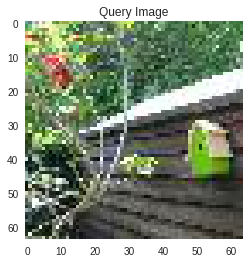

最接近的8张图片为:  ['tiny-imagenet-200/train/n02843684/images/n02843684_66.JPEG', 'tiny-imagenet-200/train/n02002724/images/n02002724_49.JPEG', 'tiny-imagenet-200/train/n04366367/images/n04366367_142.JPEG', 'tiny-imagenet-200/train/n01984695/images/n01984695_334.JPEG', 'tiny-imagenet-200/train/n02437312/images/n02437312_380.JPEG', 'tiny-imagenet-200/train/n02236044/images/n02236044_485.JPEG', 'tiny-imagenet-200/train/n01641577/images/n01641577_149.JPEG', 'tiny-imagenet-200/train/n02795169/images/n02795169_64.JPEG']


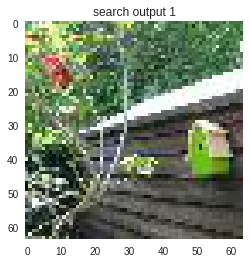

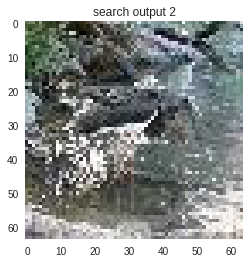

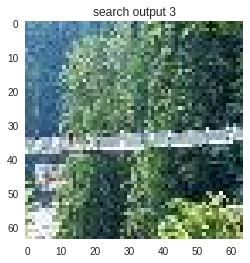

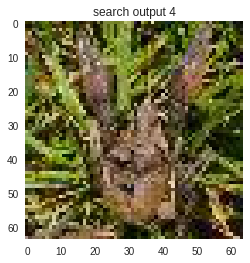

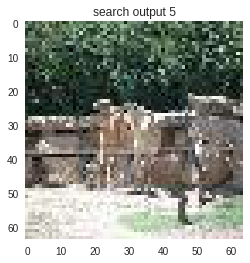

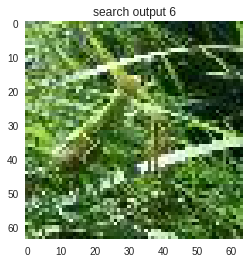

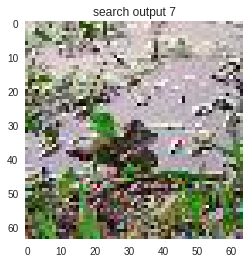

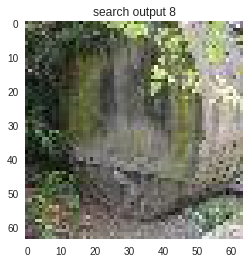

In [0]:
input_img = "tiny-imagenet-200/train/n02843684/images/n02843684_66.JPEG"
max_res = 8
image_retrieval(input_img, max_res, feats)

# 使用近似最近邻算法加速
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [0]:
feats.shape

(2366, 1, 512)

In [0]:
!pip install nearpy
from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections

DIMENSIONS = 512
PROJECTIONBITS = 16
ENGINE = Engine(DIMENSIONS, lshashes=[RandomBinaryProjections('rbp', PROJECTIONBITS,rand_seed=2611),
                                      RandomBinaryProjections('rbp', PROJECTIONBITS,rand_seed=261),
                                      RandomBinaryProjections('rbp', PROJECTIONBITS,rand_seed=26)])


for i,f in enumerate(feats.reshape(feats.shape[0],-1)):
  #print(i, f.shape)
  ENGINE.store_vector(f, i)


def image_retrieval_fast(input_img, max_res, ann):
  # 读取待检索图片与展示
  queryImg = mpimg.imread(input_img)
  plt.title("Query Image")
  plt.imshow(queryImg)
  plt.grid(None)
  plt.show()

  # 初始化Inception模型
  model = VGGNet()

  # 抽取特征，使用近似最近邻算法快速检索召回
  queryVec = model.extract_feat(input_img)
  imlist = [img_list[int(k)] for v,k,d in ENGINE.neighbours(queryVec.ravel())[:max_res]]


  # 选取top max_res张最相似的图片展示
  print("最接近的%d张图片为: " %max_res, imlist)

  for i,im in enumerate(imlist):
      image = mpimg.imread(im)
      plt.title("search output %d" %(i+1))
      plt.imshow(image)
      plt.grid(None)
      plt.show()

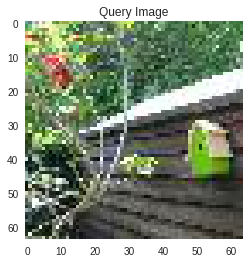

最接近的8张图片为:  ['tiny-imagenet-200/train/n02843684/images/n02843684_66.JPEG', 'tiny-imagenet-200/train/n04366367/images/n04366367_142.JPEG', 'tiny-imagenet-200/train/n02795169/images/n02795169_64.JPEG', 'tiny-imagenet-200/train/n02843684/images/n02843684_179.JPEG', 'tiny-imagenet-200/train/n03160309/images/n03160309_348.JPEG', 'tiny-imagenet-200/train/n03649909/images/n03649909_473.JPEG', 'tiny-imagenet-200/train/n02279972/images/n02279972_256.JPEG', 'tiny-imagenet-200/train/n01698640/images/n01698640_427.JPEG']


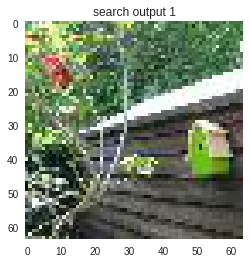

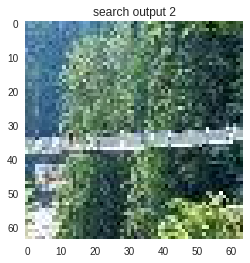

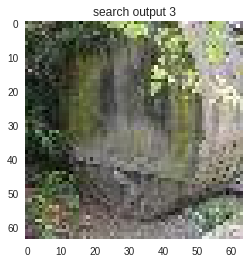

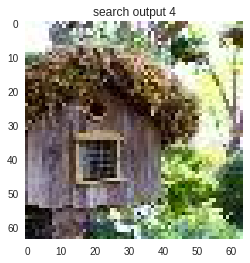

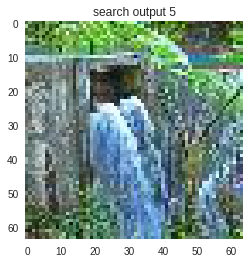

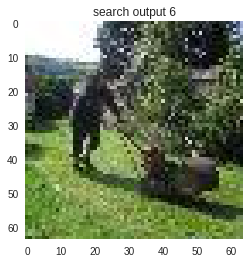

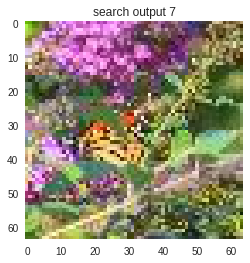

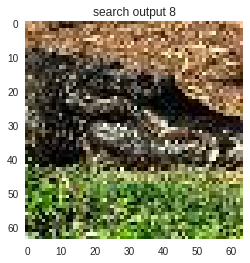

In [0]:
input_img = "tiny-imagenet-200/train/n02843684/images/n02843684_66.JPEG"
max_res = 8
image_retrieval_fast(input_img, max_res, feats)

![](../img/xiniu_neteasy.png)